# Introduction to Linear Regression

The simplest model we can fit is a line

In [1]:
import matplotlib.pyplot as plt

Line is determined by its slope/intercept

$$y=mx+c$$

In [2]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

In [3]:
m = 12
c = 40

y = [m * x_value + c for x_value in months]

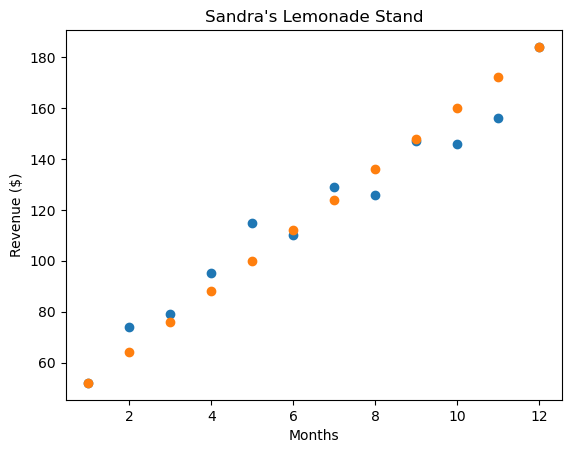

In [4]:
plt.plot(months, revenue, "o")
plt.plot(months, y, "o")
plt.title("Sandra's Lemonade Stand")
plt.xlabel("Months")
plt.ylabel("Revenue ($)")
plt.show()

----
&nbsp;
# Loss

In [5]:
x = [1, 2, 3]
y = [5, 1, 3]

#y = x
m1 = 1
b1 = 0

#y = 0.5x + 1
m2 = 0.5
b2 = 1



y_predicted1 = [m1 * x_value + b1 for x_value in x]
y_predicted2 = [m2 * x_value + b2 for x_value in x]


total_loss1 = 0

for i in range(len(y)):
  total_loss1 += (y[i] - y_predicted1[i]) ** 2


total_loss2 = 0

for i in range(len(y)):
  total_loss2 += (y[i] - y_predicted2[i]) ** 2

In [6]:
print(F"total loss 1: {total_loss1}\ntotal_loss 2: {total_loss2}")

total loss 1: 17
total_loss 2: 13.5


----
&nbsp;
## Gradient Descent for Intercept

$$-\frac{2}{N}\sum_{i=1}^{N}(y_i-(mx_i+c))$$

Where;

- N is the number of points we have in our dataset
- m is the current gradient guess
- c is the current intercept guess

Define a function called get_gradient_at_b() that takes in a set of x values, x, a set of y values, y, a slope m, and an intercept value b.

In [7]:
def get_gradient_at_c(x, y, c, m):
  N = len(x)
  diff = 0
  for i in range(N):
    y_val = y[i]
    x_val = x[i]
    diff += (y_val - ((m * x_val) + c))
    c_gradient = -(2/N) * diff
  return c_gradient

## Gradient Descent for Slope

$$-\frac{2}{N}\sum_{i=1}^{N}x_i(y_i-(mx_i+c))$$

To find the m gradient:

- Find the sum of x_value * (y_value - (m*x_value + b)) for all the y_values and x_values we have
- Multiply the sum by a factor of -2/N. N is the number of points we have.

In [8]:
def get_gradient_at_m(x, y, m ,c):
  diff = 0
  N = len(x)
  for i in range(N):
    y_val = y[i]
    x_val = x[i]
    diff += x_val * (y_val - ((m * x_val) + c))
  m_gradient = -(2/N) * diff
  return m_gradient

In [9]:
def step_gradient(x, y, c_current, m_current):
  c_gradient = get_gradient_at_c(x, y, c_current, m_current)
  m_gradient = get_gradient_at_m(x, y, c_current, m_current)

  c = c_current - (0.01 * c_gradient)
  m = m_current - (0.01 * m_gradient)
  return [c, m]

In [10]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept guess:
c = 0
# current slope guess:
m = 0

c, m = step_gradient(months, revenue, c, m)
print(c, m)

2.355 17.78333333333333


----
&nbsp;
# Putting it all together

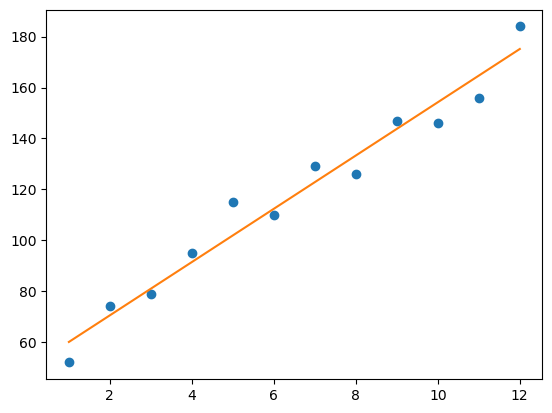

In [12]:
# Updated step_gradient function
import matplotlib.pyplot as plt

def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff
  return m_gradient

#Your step_gradient function here
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]

#Your gradient_descent function here:
def gradient_descent(x, y, learning_rate, num_iterations):
  b = 0
  m = 0
  for i in range(num_iterations):
    b, m = step_gradient(b, m, x, y, learning_rate)
  return [b,m]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#Uncomment the line below to run your gradient_descent function
b, m = gradient_descent(months, revenue, 0.01, 1000)

#Uncomment the lines below to see the line you've settled upon!
y = [m*x + b for x in months]

plt.plot(months, revenue, "o")
plt.plot(months, y)

plt.show()

